In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [2]:
df = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIoT2023 rows 1814248_1%, 3%, 4%, 80%, 80%, 90%, 90%, 90%, 100%.csv")

In [3]:
print("Jumlah data:", df.shape)
print("Jumlah kelas unik:", df['Attack Type'].nunique())
print("Distribusi kelas:\n", df['Attack Type'].value_counts())

Jumlah data: (1814248, 47)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              1072620
DoS                415004
Mirai              151704
BENIGN              95625
Network Attack      46990
Recon               29752
Brute Force          1198
Injection            1047
Malware               308
Name: count, dtype: int64


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
A

In [6]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (1814248, 47)


In [7]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Attack Type'],
      dtype='object')


In [8]:
print("Jumlah data Clean:", df_clean.shape)
print("Jumlah kelas unik Clean:", df_clean['Attack Type'].nunique())
print("Distribusi kelas Clean:\n", df_clean['Attack Type'].value_counts())

Jumlah data Clean: (1814248, 47)
Jumlah kelas unik Clean: 9
Distribusi kelas Clean:
 Attack Type
DDoS              1072620
DoS                415004
Mirai              151704
BENIGN              95625
Network Attack      46990
Recon               29752
Brute Force          1198
Injection            1047
Malware               308
Name: count, dtype: int64


In [9]:
X = df_clean.drop(['Attack Type'], axis=1)
y = df_clean['Attack Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
size = len(X.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(X_scaled, len(X) // 500):
    ipca.partial_fit(batch)

transformed_features = ipca.transform(X_scaled)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = y.values

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 94.16%


In [11]:
print("Dataset Baru yang Sudah Mengalami PCA:\n")
new_data

Dataset Baru yang Sudah Mengalami PCA:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Attack Type
0,-1.250007,0.539703,-1.839582,-0.419891,0.028408,1.560165,0.569727,-0.047029,-0.920024,-0.169713,...,0.000159,-0.019479,-0.032818,-0.528706,0.123909,-0.193924,0.161543,-0.164973,-0.157795,DDoS
1,-1.698588,6.072163,4.470261,0.645164,-0.007495,0.167994,-0.118715,0.011348,-0.228772,-0.201969,...,-0.007633,-0.017657,-0.039666,-0.442349,0.107897,0.008859,-0.118492,-0.035910,-0.547832,DDoS
2,-1.111998,0.473077,-0.670136,-0.121311,0.016782,0.295640,0.020281,-0.026981,0.443237,0.733853,...,0.060257,0.183154,0.488142,2.831991,-0.512008,1.014391,-0.070802,0.231366,0.081976,DDoS
3,-1.111608,0.066293,-0.449818,-0.024765,0.012013,-0.047573,-0.146430,-0.006786,0.283736,0.061621,...,-0.001406,-0.006608,-0.012608,-0.186124,-0.002802,0.533728,-0.257137,-0.109709,-0.181478,DDoS
4,0.726305,1.428769,-1.693503,-0.997495,0.007421,-2.187112,-0.766537,0.007232,1.646683,2.984051,...,-0.036479,-0.064387,-0.335809,-0.636079,-0.332999,0.805161,-0.322234,1.581921,1.626744,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814243,-1.260832,0.452239,-1.621427,-0.353367,0.026798,1.328606,0.463287,-0.040862,-0.743458,-0.131684,...,0.000222,-0.016819,-0.029719,-0.514849,0.140732,-0.056755,0.091320,-0.190980,-0.182207,DDoS
1814244,-0.539207,0.713814,-1.450562,-0.652885,0.017430,-1.869479,-0.781808,-0.012743,1.750096,3.310616,...,-0.021191,-0.011509,-0.136300,-0.977883,0.273087,-0.501062,0.248598,-0.110085,-0.235249,DDoS
1814245,-1.174340,-1.543602,0.772608,0.560325,0.052006,-0.645738,-0.322764,0.031909,-0.112041,-0.425311,...,-0.007682,-0.020575,0.076775,-0.155646,-0.078046,-0.079589,0.012859,0.154514,0.137167,DDoS
1814246,-1.112006,0.473059,-0.670102,-0.121383,0.016782,0.295592,0.020435,-0.026983,0.443243,0.733855,...,0.060257,0.183154,0.488143,2.831990,-0.512006,1.014387,-0.070805,0.231365,0.081975,DDoS


In [12]:
print("Explained Variance per Component:")
for i, var in enumerate(ipca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

print(f"\nTotal Variansi Dijelaskan: {sum(ipca.explained_variance_ratio_):.2%}")

Explained Variance per Component:
PC1: 19.39%
PC2: 8.58%
PC3: 7.28%
PC4: 7.09%
PC5: 6.07%
PC6: 4.78%
PC7: 4.49%
PC8: 4.17%
PC9: 3.88%
PC10: 3.59%
PC11: 2.80%
PC12: 2.41%
PC13: 2.28%
PC14: 2.27%
PC15: 2.27%
PC16: 2.27%
PC17: 2.27%
PC18: 2.07%
PC19: 1.63%
PC20: 1.27%
PC21: 1.16%
PC22: 1.13%
PC23: 1.01%

Total Variansi Dijelaskan: 94.16%


In [13]:
# Menampilkan bobot (loading) semua fitur terhadap PC1
pc1_loadings = ipca.components_[0]  # Baris pertama adalah PC1
# Misal features.columns adalah list nama fitur asli
pc1_df = pd.DataFrame({
    'Feature': X.columns,
    'PC1_Weight': pc1_loadings
}).sort_values(by='PC1_Weight', key=abs, ascending=False)

print(pc1_df)


            Feature    PC1_Weight
35              Max  3.179522e-01
36              AVG  3.116803e-01
33          Tot sum  3.063625e-01
37              Std  3.053891e-01
42           Radius  3.052734e-01
41         Magnitue  3.017157e-01
38         Tot size  2.963848e-01
44         Variance  2.410592e-01
43       Covariance  2.176568e-01
18        rst_count  2.042339e-01
1     Header_Length  1.938057e-01
34              Min  1.839185e-01
20            HTTPS  1.831519e-01
11  ack_flag_number  1.620391e-01
3          Duration  1.538874e-01
17        urg_count  1.369595e-01
8   syn_flag_number -6.971487e-02
39              IAT  4.609225e-02
7   fin_flag_number -4.580468e-02
9   rst_flag_number -4.567238e-02
2     Protocol Type  4.555077e-02
45           Weight  4.493165e-02
40           Number  4.492406e-02
27              UDP -3.749921e-02
14        ack_count -3.699917e-02
16        fin_count -2.865588e-02
30             ICMP -2.139459e-02
15        syn_count  1.479950e-02
5             

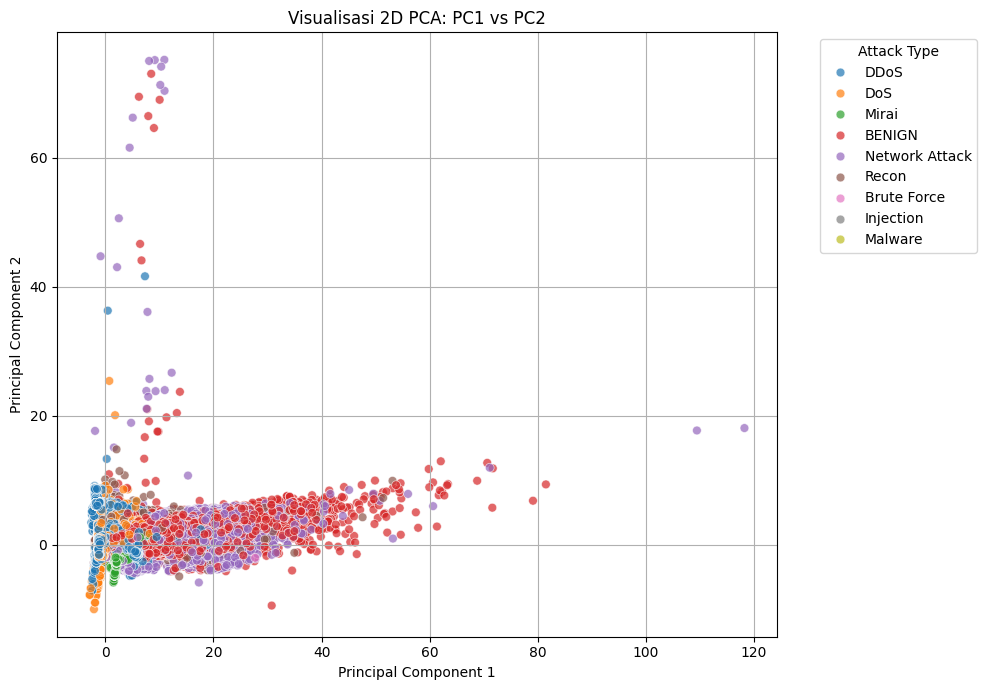

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=new_data,
    x='PC1', y='PC2',
    hue='Attack Type',
    palette='tab10',
    alpha=0.7,
    s=40
)
plt.title('Visualisasi 2D PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


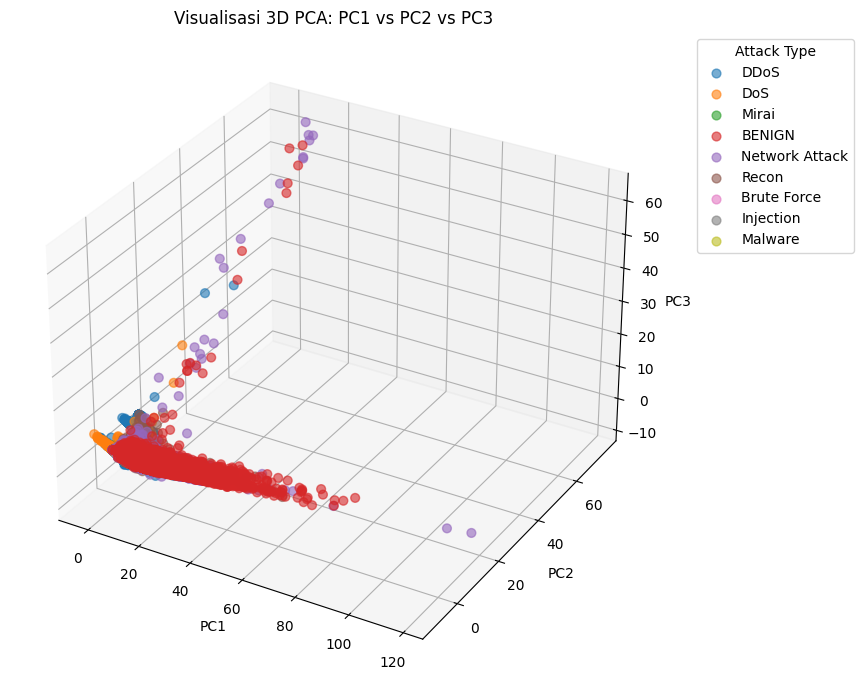

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ambil warna unik untuk setiap label
labels = new_data['Attack Type'].unique()
colors = cm.tab10.colors

for i, label in enumerate(labels):
    subset = new_data[new_data['Attack Type'] == label]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        label=label,
        color=colors[i % len(colors)],
        alpha=0.6,
        s=40
    )

ax.set_title('Visualisasi 3D PCA: PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
print("Jumlah data IPCA 50% dari dataset sample 10%:", new_data.shape)
print("Jumlah kelas unik:", new_data['Attack Type'].nunique())
print("Distribusi kelas:\n", new_data['Attack Type'].value_counts())

Jumlah data IPCA 50% dari dataset sample 10%: (1814248, 24)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              1072620
DoS                415004
Mirai              151704
BENIGN              95625
Network Attack      46990
Recon               29752
Brute Force          1198
Injection            1047
Malware               308
Name: count, dtype: int64


In [17]:
new_data.to_csv("CICIoT2023_noniid2IPCASTD10%.csv", index=False)
print("Dataset telah disimpan sebagai CICIoT2023_noniid2IPCASTD10%.csv")

Dataset telah disimpan sebagai CICIoT2023_noniid2IPCASTD10%.csv
